In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import statsmodels.formula.api as sm
import pandas as pd
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.decomposition import PCA
import json
%matplotlib inline

In [2]:
with open('reviews.json', 'rb') as f:
    data = f.readlines()
    
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

data_df = pd.read_json(data_json_str)

In [3]:
print data_df[0:10]

         asin helpful  overall  \
0  B000F83SZQ  [0, 0]        5   
1  B000F83SZQ  [2, 2]        4   
2  B000F83SZQ  [2, 2]        4   
3  B000F83SZQ  [1, 1]        5   
4  B000F83SZQ  [0, 1]        4   
5  B000F83SZQ  [0, 0]        4   
6  B000F83SZQ  [0, 0]        4   
7  B000F83SZQ  [1, 1]        4   
8  B000FA64PA  [0, 0]        5   
9  B000FA64PA  [0, 0]        4   

                                          reviewText   reviewTime  \
0  I enjoy vintage books and movies so I enjoyed ...   05 5, 2014   
1  This book is a reissue of an old one; the auth...   01 6, 2014   
2  This was a fairly interesting read.  It had ol...   04 4, 2014   
3  I'd never read any of the Amy Brewster mysteri...  02 19, 2014   
4  If you like period pieces - clothing, lingo, y...  03 19, 2014   
5  A beautiful in-depth character description mak...  05 26, 2014   
6  I enjoyed this one tho I'm not sure why it's c...  06 10, 2014   
7  Never heard of Amy Brewster. But I don't need ...  03 22, 2014   
8  D

In [4]:
years = []
months = []
days = []
for date in data_df['reviewTime']:
    splitted = date.split(' ')
    years.append(splitted[2])
    months.append(splitted[0])
    day = splitted[1]
    days.append(day[:-1])
    
date_df = pd.DataFrame({'year': years,
                       'month': months,
                       'day': days})

print date_df.iloc[0]
final_dates = pd.to_datetime(date_df)

day         5
month      05
year     2014
Name: 0, dtype: object


In [5]:
data_df['datetimes'] = final_dates

In [6]:
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [77]:
by_date = pd.DataFrame(data_df['datetimes'].value_counts())

start_date = date(2000, 3, 5)
end_date = date(2014, 7, 23)

date_array = np.zeros(5253)
i = 0
for single_date in daterange(start_date, end_date):
    b = 1
    for idx, value in by_date.iterrows():
        if pd.to_datetime(single_date.strftime("%Y-%m-%d %H:%M:%S")) == idx:
            date_array[i] = value[0]
            b = 0
    if b == 1:
        date_array[i] = 0
    i = i + 1

In [59]:
i = 0
for a in daterange(start_date, end_date):
    i = i + 1
print i

5253


In [76]:
for idx, value in by_date.iterrows():
    print value[0]
    
#for single_date in daterange(start_date, end_date):
#    print type(pd.to_datetime(single_date.strftime("%Y-%m-%d %H:%M:%S")))

2728
2588
2571
2562
2555
2538
2518
2499
2480
2449
2442
2408
2407
2405
2401
2398
2390
2389
2365
2350
2348
2342
2334
2315
2310
2302
2287
2287
2282
2271
2262
2259
2258
2256
2248
2246
2245
2230
2227
2226
2224
2207
2205
2186
2180
2177
2175
2173
2170
2169
2167
2164
2163
2160
2160
2156
2155
2154
2152
2146
2138
2138
2138
2134
2131
2126
2124
2121
2118
2116
2113
2111
2105
2103
2102
2095
2093
2089
2085
2082
2072
2071
2068
2065
2042
2035
2033
2032
2030
2027
2023
2015
2013
2013
2009
2008
2006
2003
2002
2001
2000
1999
1995
1993
1991
1981
1978
1974
1974
1972
1971
1970
1968
1968
1964
1964
1959
1957
1957
1956
1955
1951
1948
1948
1947
1940
1940
1931
1929
1922
1912
1909
1909
1902
1895
1889
1884
1883
1877
1871
1871
1870
1870
1870
1867
1867
1866
1864
1864
1860
1858
1854
1836
1832
1830
1823
1823
1821
1813
1807
1806
1804
1803
1801
1800
1795
1795
1792
1787
1783
1780
1779
1771
1770
1766
1765
1764
1763
1756
1756
1752
1751
1748
1742
1740
1740
1740
1738
1736
1732
1729
1718
1715
1710
1701
1698
1692
1688
1683
1673


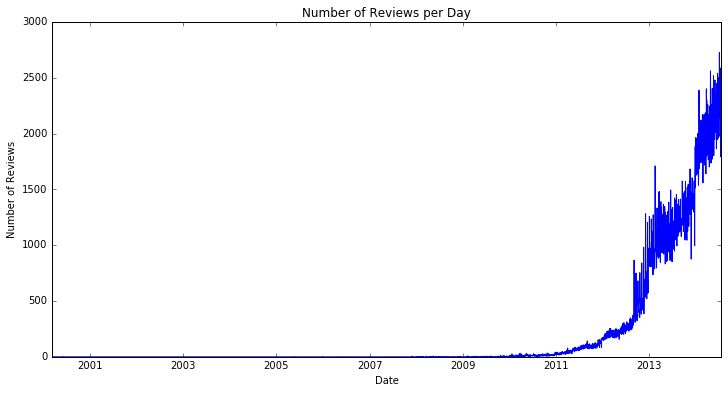

In [90]:
x = np.linspace(0,len(date_array),len(date_array))
dates = []
for single_date in daterange(start_date, end_date):
    dates.append(single_date)
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Per Day')
plt.plot(dates, date_array)
plt.show()

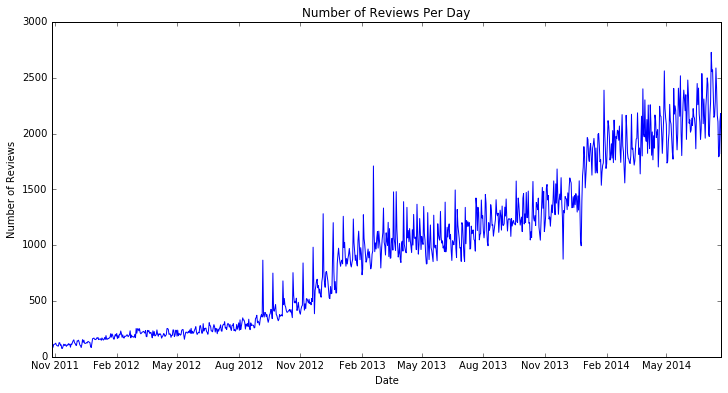

In [94]:
dates_new = dates[-1000:]
date_array_new = date_array[-1000:]
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Per Day')
plt.plot(dates_new, date_array_new)
plt.show()

In [10]:
data_df.head()

len(data_df['reviewText'][0])

review_helpfulness = data_df[['reviewText','helpful','overall']]

lengths = []
for i in review_helpfulness['reviewText']:
    lengths.append(len(i))

#review_helpfulness['char_count'] = review_helpfulness['helpful']
#for i in range(len(review_helpfulness)):
#    review_helpfulness['char_count'][i] = len(review_helpfulness['reviewText'][i])
#review_helpfulness.head()
lengths = pd.Series(lengths)

review_helpfulness['lengths'] = lengths

print review_helpfulness.head()

                                          reviewText helpful  overall  lengths
0  I enjoy vintage books and movies so I enjoyed ...  [0, 0]        5      294
1  This book is a reissue of an old one; the auth...  [2, 2]        4      455
2  This was a fairly interesting read.  It had ol...  [2, 2]        4      375
3  I'd never read any of the Amy Brewster mysteri...  [1, 1]        5      101
4  If you like period pieces - clothing, lingo, y...  [0, 1]        4      130


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


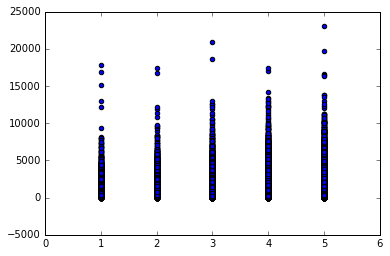

In [14]:
#plt.figure(figsize=(12,12))
plt.scatter(review_helpfulness['overall'], review_helpfulness['lengths'])
plt.show()

In [28]:
lengths1 = []
lengths2 = []
lengths3 = []
lengths4 = []
lengths5 = []

b = 0
for i in review_helpfulness['overall']:
    if i == 1:
        lengths1.append(review_helpfulness['lengths'][b])
    if i == 2:
        lengths2.append(review_helpfulness['lengths'][b])
    if i == 3:
        lengths3.append(review_helpfulness['lengths'][b])
    if i == 4:
        lengths4.append(review_helpfulness['lengths'][b])
    if i == 5:
        lengths5.append(review_helpfulness['lengths'][b])
    b = b + 1

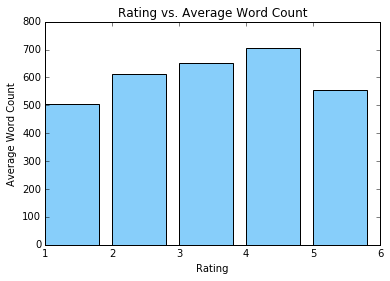

In [70]:
averages = [np.mean(lengths1), np.mean(lengths2), np.mean(lengths3), np.mean(lengths4), np.mean(lengths5)]
x = np.linspace(1,5,5)

plt.bar(x, averages,color="lightskyblue")
plt.xlabel('Rating')
plt.ylabel('Average Word Count')
plt.title('Rating vs. Average Word Count')
plt.show()

In [20]:
proportions = []
for i in review_helpfulness['helpful']:
    if i[1] == 0:
        proportions.append(0)
    else:
        proportions.append(float(i[0])/float(i[1]))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


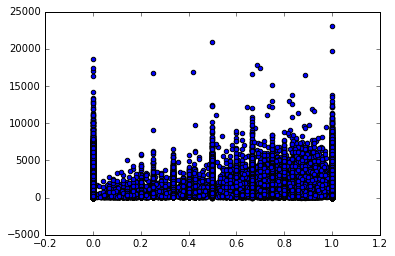

In [17]:
proportions = pd.Series(proportions)
review_helpfulness['proportions'] = proportions

plt.scatter(review_helpfulness['proportions'], review_helpfulness['lengths'])
plt.show()

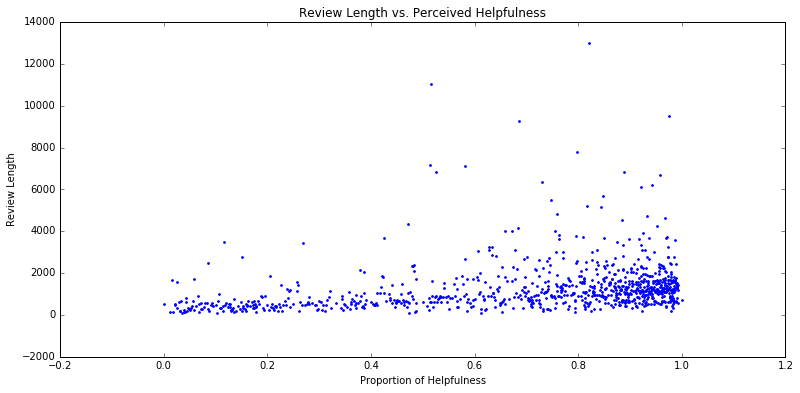

In [67]:
a = pd.DataFrame(review_helpfulness.groupby(['proportions'])['lengths'].mean(), review_helpfulness.groupby(['proportions'])['lengths'].mean().index)
a = a.reset_index()
a.head()

plt.figure(figsize=(13,6))
plt.scatter(a['proportions'],a['lengths'],s=3,color="blue")
plt.xlabel('Proportion of Helpfulness')
plt.ylabel('Review Length')
plt.title('Review Length vs. Perceived Helpfulness')
plt.show()

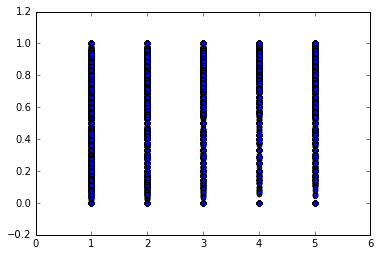

In [19]:
plt.scatter(review_helpfulness['overall'],review_helpfulness['proportions'])
plt.show()